In [4]:
import numpy as np
import pandas as pd
import io

In [5]:
uploaded = pd.read_csv('RealDragonEstate2.csv')

In [6]:
uploaded

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
data = uploaded.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          501 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    int64  
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  MEDV        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [8]:
del(data['Unnamed: 0'])
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Visualizing data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d053bd790>,
      dtype=object)

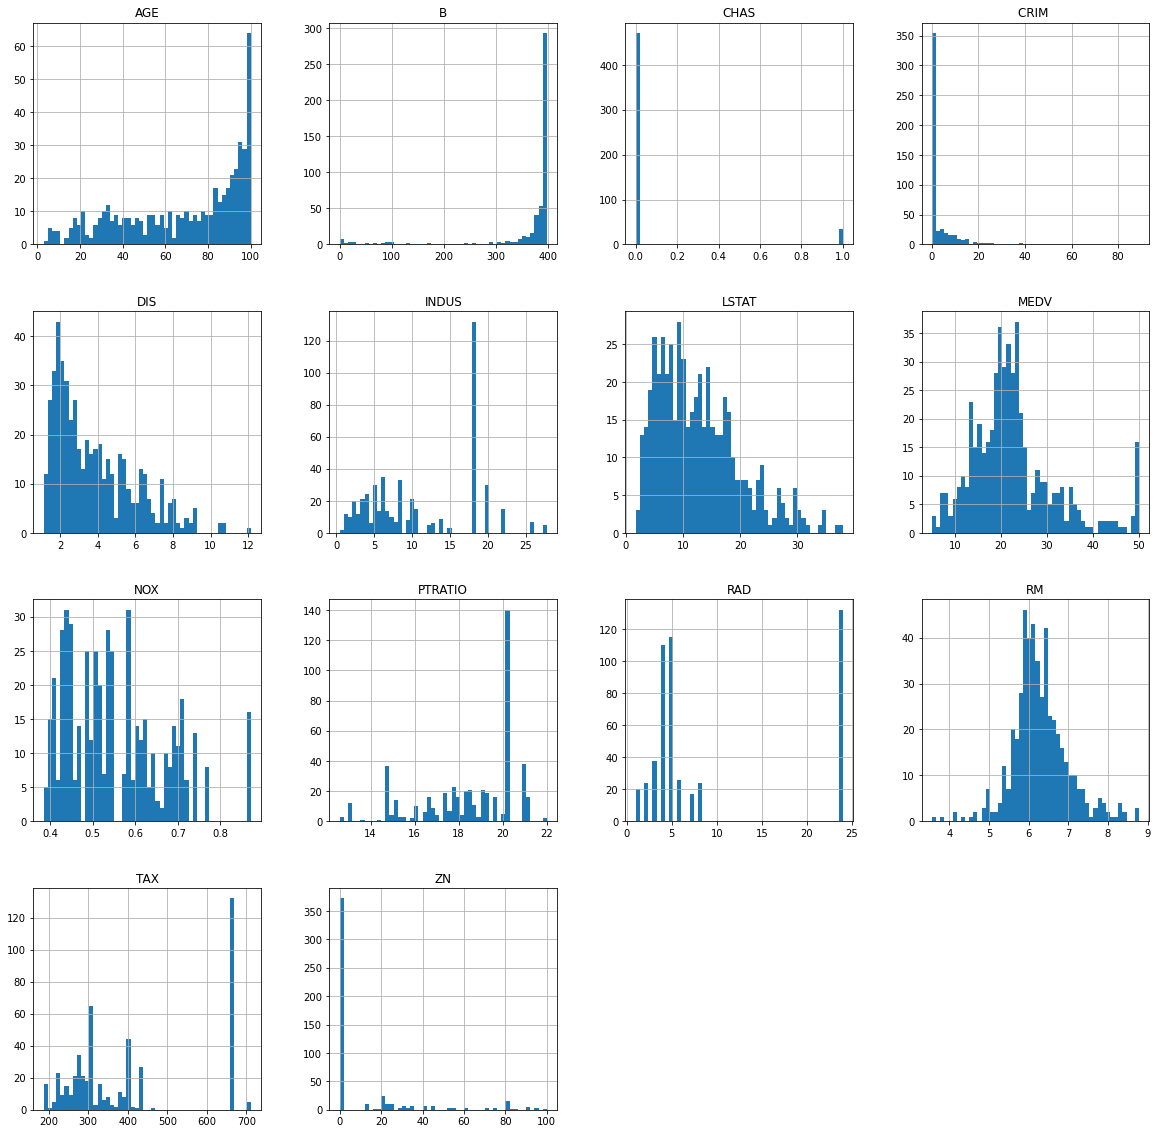

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize=(20,20))

# Splitting into train-test dataset

**from sklearn.model_selection import train_test_split:**
train_set, test_set = train_test_split(data, train_size= 0.8, random_state = 42)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, train_size=0.8, random_state= 42)
for train_index, test_index in split.split(data, data['CHAS']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [11]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [12]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [13]:
data['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
train_set = strat_train_set.copy()
test_set = strat_test_set.copy()

In [17]:
print(strat_train_set.info())
print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN

# See features correlation

In [18]:
cor_matrix = train_set.corr()
cor_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.212927,0.416640,-0.061482,0.430879,-0.257663,0.361890,-0.386900,0.648221,0.603934,0.305603,-0.486869,0.471442,-0.393715
ZN,-0.212927,1.000000,-0.542161,-0.023536,-0.509327,0.292252,-0.565680,0.666939,-0.306480,-0.322803,-0.390570,0.188575,-0.420097,0.339741
INDUS,0.416640,-0.542161,1.000000,0.043686,0.759051,-0.385324,0.644114,-0.708612,0.580908,0.716288,0.384465,-0.368685,0.611068,-0.473516
CHAS,-0.061482,-0.023536,0.043686,1.000000,0.077490,0.100385,0.058388,-0.088081,-0.023005,-0.048802,-0.132682,0.048275,-0.077592,0.205066
NOX,0.430879,-0.509327,0.759051,0.077490,1.000000,-0.300860,0.727358,-0.763623,0.596012,0.659049,0.164977,-0.408434,0.602386,-0.422873
RM,-0.257663,0.292252,-0.385324,0.100385,-0.300860,1.000000,-0.241318,0.204159,-0.200095,-0.282449,-0.331544,0.122472,-0.603006,0.680857
AGE,0.361890,-0.565680,0.644114,0.058388,0.727358,-0.241318,1.000000,-0.734827,0.449489,0.501491,0.259633,-0.287900,0.599211,-0.364596
DIS,-0.386900,0.666939,-0.708612,-0.088081,-0.763623,0.204159,-0.734827,1.000000,-0.481556,-0.530840,-0.215173,0.309222,-0.501408,0.240451
RAD,0.648221,-0.306480,0.580908,-0.023005,0.596012,-0.200095,0.449489,-0.481556,1.000000,0.910932,0.471912,-0.490951,0.479857,-0.374693
TAX,0.603934,-0.322803,0.716288,-0.048802,0.659049,-0.282449,0.501491,-0.530840,0.910932,1.000000,0.473026,-0.475293,0.534228,-0.456657


In [19]:
cor_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cf96ed750>,
      dtype=object)

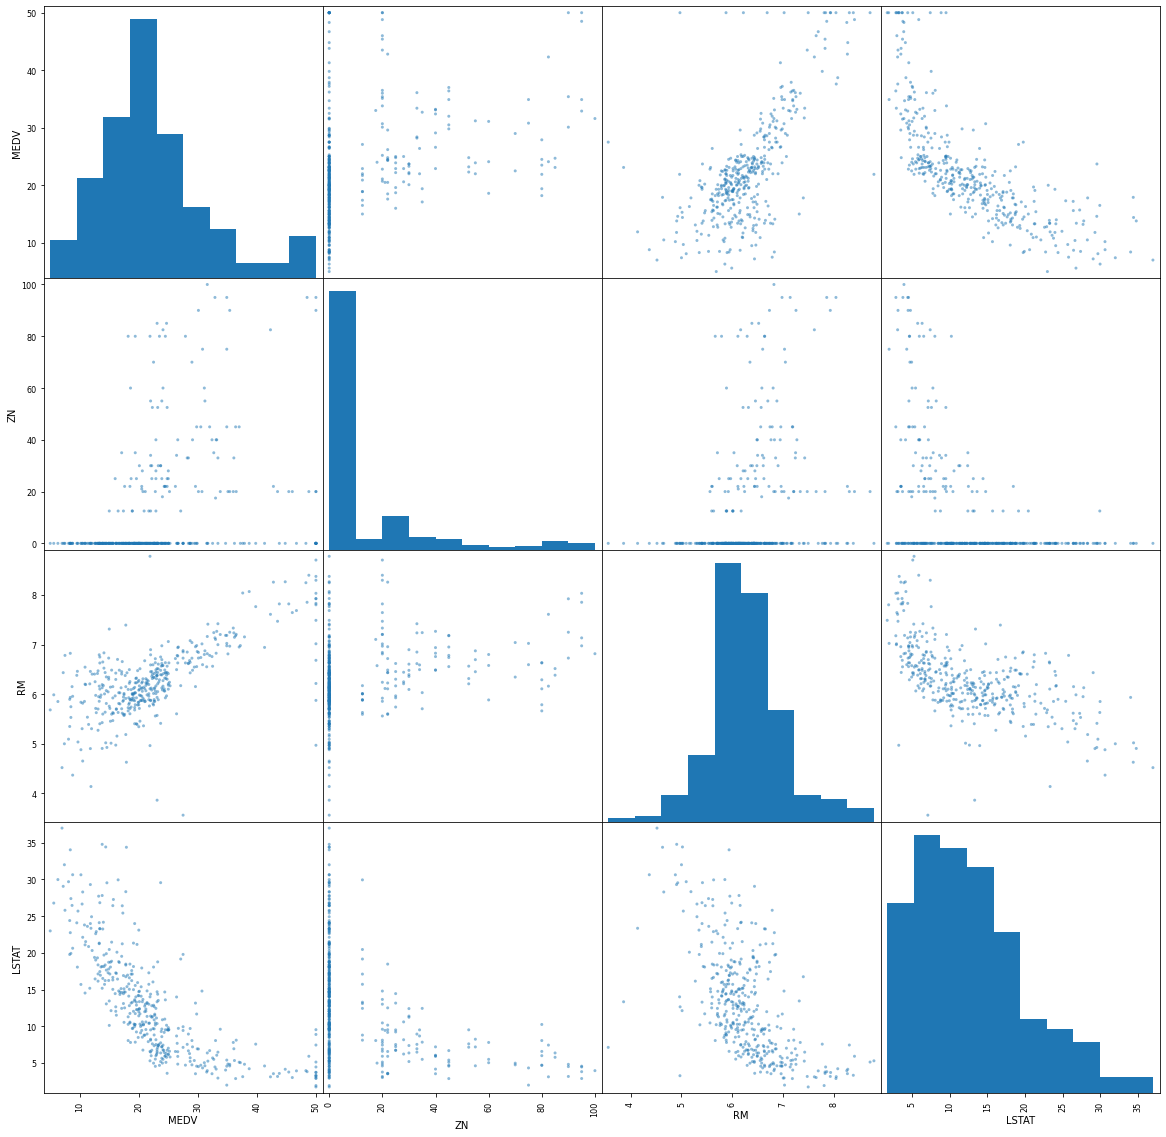

In [20]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'ZN', 'RM', 'LSTAT']
scatter_matrix(train_set[attributes], figsize=(20,20))

# Trying Out Attribute Combination

In [21]:
train_set['TAXRM'] = train_set['TAX']/train_set['RM']
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
 14  TAXRM    399 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 50.5 KB


In [22]:
housing = train_set.drop('MEDV', axis=1)
housing_labels = train_set['MEDV'].copy()
print(housing.shape)
housing.head()


(404, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,45.468948


In [23]:
housing_labels.head()

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

# Fix missing attributes

For taking care of missing attributes:

  1.Get rid of missing data points

  2.Get rid of the whole attributes
  
  3.Set the value to some value (0, mean or median):
      
      median = train_set['RM'].median()
      
      train_set['RM'].fillna(median)

In [24]:
train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.696004
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.577122
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.910026
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,54.831220
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.673976
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'median')
imputer.fit(train_set)

SimpleImputer(strategy='median')

In [26]:
imputer.statistics_

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20900000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 2.11500000e+01, 5.48312199e+01])

In [27]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
 14  TAXRM    399 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 50.5 KB


In [28]:
train_set = pd.DataFrame(imputer.transform(train_set), columns= train_set.columns)
train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.536786
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.412918
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,45.017395
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,54.831220
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [29]:
train_set.shape

(404, 15)

# Creating Pipline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

**Primarily all objects are 3 types of objects:**
1. Estimators - Estimates some parameters based on dataset. Eg. Imputer(fit(),transform())
          
        fit() - fits the dataset & calculates internal parameters.
2. Transformers - Takes Input and returns output based on prevoious set fit().
        fit_transform() - fits the dataset & then transforms the data(optimzed).
3. Predictors - models. Eg. LinearRegression, KNN. (fit(), predict(),score()).




**Peimarily 2 types of features scalling methods:**
  1. Min-max Scalling / Normalization -> val = (value-min)/(max-min) # MinMaxScaler class
  2. Stadardization = val = (value-mean)/std # StandardScaler class

In [31]:
my_pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy = 'median')),
        ('std_scalar', StandardScaler())
    ]
)

In [32]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr.shape

(404, 14)

In [33]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ...,  0.41164221,
        -0.86091034, -0.50886303],
       [-0.44352175,  3.12628155, -1.35893781, ...,  0.39131918,
        -0.94116739, -0.80755787],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.44624347,
         0.81480158,  1.12123315],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ...,  0.41831233,
        -1.27603303, -1.02768699],
       [ 0.14210728, -0.4898311 ,  0.98336806, ..., -3.15239177,
         0.73869575,  1.10066172],
       [-0.43974024, -0.4898311 ,  0.37049623, ...,  0.41070422,
         0.09940681, -0.65856363]])

# Building Desired Model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [35]:
lin_model = LinearRegression()
lin_model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [36]:
dt_model = DecisionTreeRegressor()
dt_model.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor()

In [37]:
rf_model = RandomForestRegressor()
rf_model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

# Selecting Desired Model

In [38]:
sample_data = housing.iloc[:5]
sample_labels = housing_labels.iloc[:5]

In [39]:
sample_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,45.468948


In [40]:
sample_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [41]:
prepared_data = my_pipeline.transform(sample_data)

In [42]:
lin_model.predict(prepared_data)

array([22.74142142, 26.97794513, 18.97894706, 24.93653477, 24.08296435])

In [43]:
dt_model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [44]:
rf_model.predict(prepared_data)

array([22.309, 25.664, 16.467, 23.431, 23.627])

# Evaluating Model

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
lin_mse = mean_squared_error(housing_labels, lin_model.predict(housing_num_tr))
lin_rmse = np.sqrt(lin_mse)
print("RMSE for Linear Regression: ", lin_rmse)

RMSE for Linear Regression:  4.277610497216961


In [47]:
dt_mse = mean_squared_error(housing_labels, dt_model.predict(housing_num_tr))
dt_rmse = np.sqrt(dt_mse)
print("RMSE for Decission Tree: ", dt_rmse)

RMSE for Decission Tree:  0.0


In [48]:
rf_mse = mean_squared_error(housing_labels, rf_model.predict(housing_num_tr))
rf_rmse = np.sqrt(rf_mse)
print("RMSE for Random Forest: ", rf_rmse)

RMSE for Random Forest:  1.2660128434585398


# Using Cross-Validation

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
def print_scores(scores):
  print(f'Scores: {scores}')
  print(f'Mean: {scores.mean()}')
  print(f'Standard Deviation: {scores.std()}')

In [51]:
# For Linear Regression
scores = cross_val_score(lin_model, housing_num_tr, housing_labels, scoring = 'neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)
print_scores(rmse_scores)

Scores: [3.32546936 3.2207587  4.33002429 3.61561604 4.87942502 4.00137121
 7.4743536  4.23851108 3.65905946 5.11074694]
Mean: 4.385533570427063
Standard Deviation: 1.1867571051871042


In [52]:
# For Decission Tree
scores = cross_val_score(dt_model, housing_num_tr, housing_labels, scoring = 'neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)
print_scores(rmse_scores)

Scores: [3.78562751 5.28636073 4.87927424 4.2701745  3.91260783 2.70781277
 4.81897292 3.54679433 3.38821487 3.39823484]
Mean: 3.9994074517195592
Standard Deviation: 0.7639825282182455


In [53]:
# For Random Forest
scores = cross_val_score(rf_model, housing_num_tr, housing_labels, scoring = 'neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)
print_scores(rmse_scores)

Scores: [2.83079329 2.71667595 4.31509327 2.76285437 3.46514165 2.68051337
 5.00524791 3.33666197 2.9600592  3.2683887 ]
Mean: 3.334142968321158
Standard Deviation: 0.7283208937230907


# **Model Output**
# for Decision Tree:
    Scores: [3.32546936 3.2207587  4.33002429 3.61561604 4.87942502 4.00137121 7.4743536  4.23851108 3.65905946 5.11074694]
    Mean: 4.385533570427063
    Standard Deviation: 1.1867571051871042



  # for Linear Regression:
    Scores: [3.84745719 5.67991755 4.85009429 4.23993787 3.94059006 3.03422148 5.09413879 3.58458505 3.51397211 4.16785316]
    Mean: 4.195276756469084
    Standard Deviation: 0.7625390098272254

  
  # for Random Forest:
    Scores: [2.91996727 2.76183527 4.48594997 2.57252789 3.59511497 2.79903755 4.3029233  3.34312649 3.17909662 3.41160416]
    Mean: 3.33711834904433
    Standard Deviation: 0.6106394864889159
    
So, best suitable model is Random Forest Regressor model.


# Saving  the Model

In [54]:
from joblib import dump, load
dump(rf_model, 'RealDragonEstate.joblib')

['RealDragonEstate.joblib']

# Testing the Model

In [55]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [56]:
strat_test_set['TAXRM'] = strat_test_set['TAX']/strat_test_set['RM']
x_test = strat_test_set.drop('MEDV', axis = 1)
y_test = strat_test_set['MEDV'].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions  = rf_model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print('RMSE: ', final_rmse)
print(final_predictions, list(y_test))

RMSE:  2.8962937269795628
[24.063 11.381 25.245 22.36  18.966 14.983 20.607 14.465 31.632 41.181
 19.319 11.901 24.63  26.061 19.703 11.086 31.289 15.112 23.815 19.48
 19.855 17.945 17.444 22.053 18.103 31.613 15.878 33.366  8.555 33.285
 23.747 21.037 23.264 10.967 21.056 11.37  42.526 24.543 23.451 41.268
 24.277 30.859 20.198 20.727 18.974 33.716 44.469 20.357 20.269 21.556
 20.477 14.375 21.834 15.262 24.763 33.581 42.302 28.999 19.514 20.988
 46.581 10.079 18.892 25.475 14.551 33.873 19.939 17.811 19.193 34.599
 26.08  23.098 21.373 22.305 34.176 12.429 16.287 19.889 20.733 21.495
 22.292 21.498 14.051 23.056 21.073 20.992 14.691 21.217 21.875 23.548
 18.58  27.687  6.832 26.503 19.419 29.196 19.632 31.012 14.681 26.74
 22.688 20.563] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0